# $\rho'$ analysis notes

## Data Acqusition

### Run numbers

### Lego Train

### Data scheme

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as ps
import awkward

class UPCFiles:
    ccup8_2015 =  r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2015/pvn/ccup8.sel.new.root"
    ccup9_2015 =  r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2015/pvn/ccup9.sel.new.root"
    ccup29_2018 = r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2018/pvn/ccup29.sel.new.root"
    ccup30_2018 = r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2018/pvn/ccup30.sel.new.root"
    ccup31_2018 = r"/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2018/pvn/ccup31.sel.new.root"
    
    ccup8_2015_win  =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\pvn\ccup8.sel.new.root"
    ccup9_2015_win  =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\pvn\ccup9.sel.new.root"
    ccup29_2018_win =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2018\pvn\ccup29.sel.new.root"
    ccup30_2018_win =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2018\pvn\ccup30.sel.new.root"
    ccup31_2018_win =  r"D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2018\pvn\ccup31.sel.new.root"
    
    ccup9_2015_my = r"D:\GoogleDrive\Job\cern\Alice\analysis\dev\grid\selection\RhoPrime\macro\AnalysisResults.root"

events = uproot.open(UPCFiles.ccup9_2015_win)['events']
entries = events.numentries
events.show()
events.name, events.title, events.numentries

dV0                        (no streamer)              asdtype("('>f4', (6,))")
EnZDC                      (no streamer)              asdtype("('>f4', (6,))")
dAD                        (no streamer)              asdtype("('>f4', (6,))")
vertex                     (no streamer)              asdtype("('>f4', (3,))")
nTracks                    (no streamer)              asdtype('>i4')
nTracklets                 (no streamer)              asdtype('>i4')
eventinfo                  (no streamer)              asdtype("('>i4', (4,))")
TDCa                       (no streamer)              asdtype("('>f4', (4,))")
TDCc                       (no streamer)              asdtype("('>f4', (4,))")
TriggerType                (no streamer)              asdtype("('>i4', (2,))")
dca0                       (no streamer)              asdtype("('>f4', (177,))")
dca1                       (no streamer)              asdtype("('>f4', (177,))")
ITSNcls                    (no streamer)              asdtype("('>i4

(b'events', b'events', 1135259)

## Four prongs selection


In [3]:
start = 0
stop  = -1 #300000
itsl0 = events.array("HasPointOnITSLayer0", entrystart=start, entrystop=stop)
itsl1 = events.array("HasPointOnITSLayer1", entrystart=start, entrystop=stop)
tpcref = events.array("StatusAndTPCRefit", entrystart=start, entrystop=stop)
itcref = events.array("StatusAndITSRefit", entrystart=start, entrystop=stop)
dca0 = events.array("dca0", entrystart=start, entrystop=stop)
dca1 = events.array("dca1", entrystart=start, entrystop=stop)
tpcncls = events.array("TPCNcls", entrystart=start, entrystop=stop)
itsncls = events.array("ITSNcls", entrystart=start, entrystop=stop)
sigmtpcpion = events.array("NumberOfSigmasTPCPion", entrystart=start, entrystop=stop)
sigmaitspion = events.array("NumberOfSigmasITSPion", entrystart=start, entrystop=stop)
pt = events.array("Pt", entrystart=start, entrystop=stop)
px = events.array("Px", entrystart=start, entrystop=stop)
py = events.array("Py", entrystart=start, entrystop=stop)
pz = events.array("Pz", entrystart=start, entrystop=stop)
q = events.array("charge", entrystart=start, entrystop=stop)
entries = len(q)
# TODO: why tpcref freq value is 64?
select = ((itsl0 == 1) + (itsl1 == 1)) * (itcref > 0)  * (np.abs(sigmaitspion) < 3) * (itsncls > 3) #* ((np.abs(dca0) < 3) + (np.abs(dca1) < 3)) * (tpcncls > 50) * (np.abs(sigmtpcpion) < 3)  * (tpcref > 0)

GoodEvents = np.argwhere(np.sum(select,axis=1)==4)
GoodTracks = np.argwhere(select[GoodEvents.flatten()]==True).reshape(len(GoodEvents),8)
GoodEventsAndTracks = np.append(GoodEvents,GoodTracks[:,1:len(GoodTracks):2], axis=1) # array([[ 389,    2,    3,    5,    7],...])
GoodEventsNumber = GoodEventsAndTracks[:,0]
GoodTracksNum = GoodEventsAndTracks[:,1:]
print(f'Numer of events with 4pr: {len(GoodEventsNumber)}')

Numer of events with 4pr: 15347


Transversal momentum distribution for ccup9 trigger:

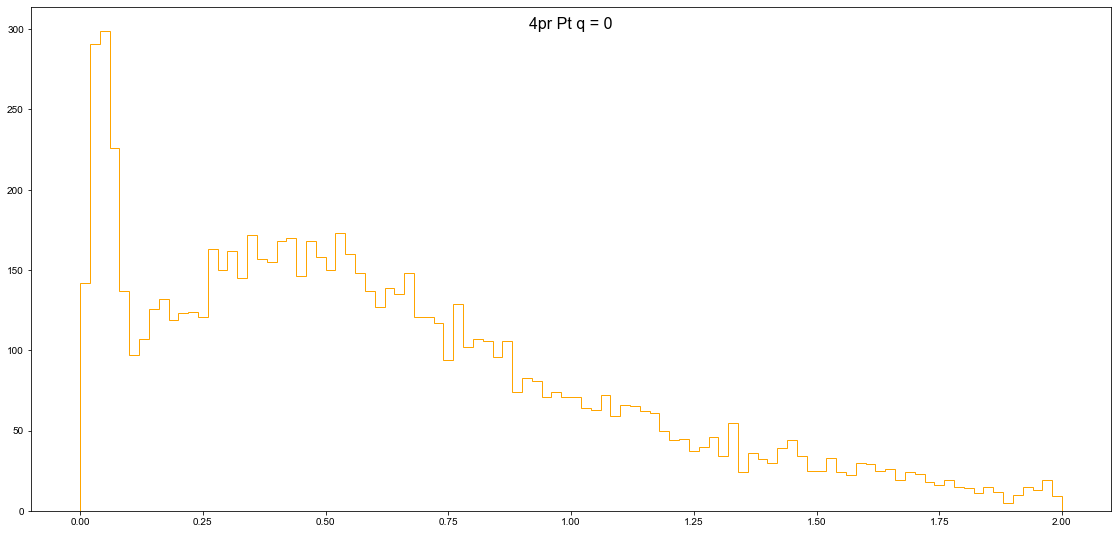

In [4]:
pxg = px[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)
pyg = py[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)
pzg = pz[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)

goodCharges = q[GoodEventsNumber][select[np.sum(select,axis=1)==4,:]].reshape(len(GoodEventsNumber),4)
goodChargesEventNumbers = np.argwhere(np.sum(goodCharges,axis=1)==0)
pvnPt = np.sqrt(np.sum(np.add(np.sum(pxg[goodChargesEventNumbers], axis=2)**2, np.sum(pyg[goodChargesEventNumbers], axis=2)**2),axis=1))
counts, bins = np.histogram(pvnPt,bins=100, range=(0,2))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr Pt q = 0', fontsize=16)
plt.style.use(hep.style.ROOT)

counts, bins = np.histogram(pvnPt, bins=100, range=(0,2))
_ = ax.hist(pvnPt, bins=bins, color='orange', histtype='step', label=f'4 TPC tracks;Entries {np.sum(counts)}')




## Mass

<ipython-input-9-40b2d914db2e>:24: RuntimeWarning: divide by zero encountered in floor_divide
  ax.errorbar(bins[:-1],counts, 30 * counts // counts,fmt='o', color='black',label=f'Entries {np.sum(counts)}')


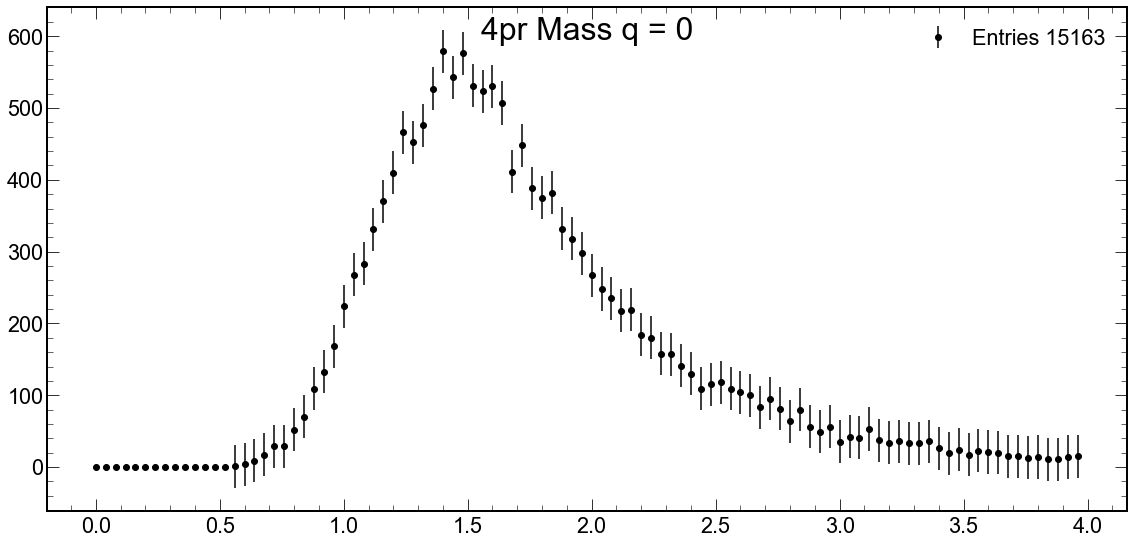

In [9]:
massPion = np.full(pxg.shape[0], 0.140)

# float esum = sqrt( (trk[0]->Px())*trk[0]->Px() + (trk[0]->Py())*trk[0]->Py() +(trk[0]->Pz())*trk[0]->Pz() + partmass*partmass);
# esum = esum + sqrt( (trk[1]->Px())*trk[1]->Px() + (trk[1]->Py())*trk[1]->Py() +(trk[1]->Pz())*trk[1]->Pz() + partmass*partmass);
# float amass = sqrt( esum*esum - pxsum*pxsum - pysum*pysum - pzsum*pzsum );


Energy0 = np.sqrt(massPion**2 + pxg[:,0]**2 + pyg[:,0]**2 + pzg[:,0]**2)
Energy1 = np.sqrt(massPion**2 + pxg[:,1]**2 + pyg[:,1]**2 + pzg[:,1]**2)
Energy2 = np.sqrt(massPion**2 + pxg[:,2]**2 + pyg[:,2]**2 + pzg[:,2]**2)
Energy3 = np.sqrt(massPion**2 + pxg[:,3]**2 + pyg[:,3]**2 + pzg[:,3]**2)

Energy = Energy0 + Energy1 + Energy2 + Energy3

Mass = np.sqrt(Energy**2 - np.sum(pxg,axis=1)**2 - np.sum(pyg,axis=1)**2 - np.sum(pzg,axis=1)**2)



counts, bins = np.histogram(Mass,bins=100, range=(0,4))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr Mass q = 0', fontsize=32)
plt.style.use(hep.style.ROOT)
ax.errorbar(bins[:-1],counts, 30 * counts // counts,fmt='o', color='black',label=f'Entries {np.sum(counts)}')

ax.legend()


## DRAFTS

Here I will move analysis to my own data:

In [32]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as ps
import awkward

ccup9_2015_my_test = r"D:\GoogleDrive\Job\cern\Alice\analysis\dev\grid\selection\RhoPrime\macro\AnalysisResults.root"
ccup9_2015_my = r'D:\GoogleDrive\Job\cern\Alice\analysis\data\RhoPrime\2015\RhoPrime2015o.root'

events = uproot.open(ccup9_2015_my)['RhoPrimeCentral/events']
entries = events.numentries
events.show()
print(events.name, events.title, events.numentries)

# mycache = uproot.ArrayCache(1024*1024 * 10)
data = events.arrays('*', namedecode="utf-8")
data['nTracks'].sum() # 2 652 742 wo limitation # 208 039 with 177 tracks limitation


# b'events' b'Selected events for 4proungs analysis' 31 selected tracks 194 with limitation up to 200 tracks events. pt has  17 events 
# b'events' b'Selected events for 4proungs analysis' 47 selected tracks 317 without limitation. pt has  17 events 


RunNum                     (no streamer)              asdtype('>i4')
PeriodNumber               (no streamer)              asdtype('>u4')
OrbitNumber                (no streamer)              asdtype('>u4')
BunchCrossNumber           (no streamer)              asdtype('>u2')
Mass                       (no streamer)              asdtype('>f4')
Pt                         (no streamer)              asdtype('>f4')
Q                          (no streamer)              asdtype('>i2')
Rapidity                   (no streamer)              asdtype('>f4')
Phi                        (no streamer)              asdtype('>f4')
ZNAenergy                  (no streamer)              asdtype('>f4')
ZNCenergy                  (no streamer)              asdtype('>f4')
ZPAenergy                  (no streamer)              asdtype('>f4')
ZPCenergy                  (no streamer)              asdtype('>f4')
VtxX                       (no streamer)              asdtype('>f4')
VtxY                       (no str

KeyboardInterrupt: 

2810


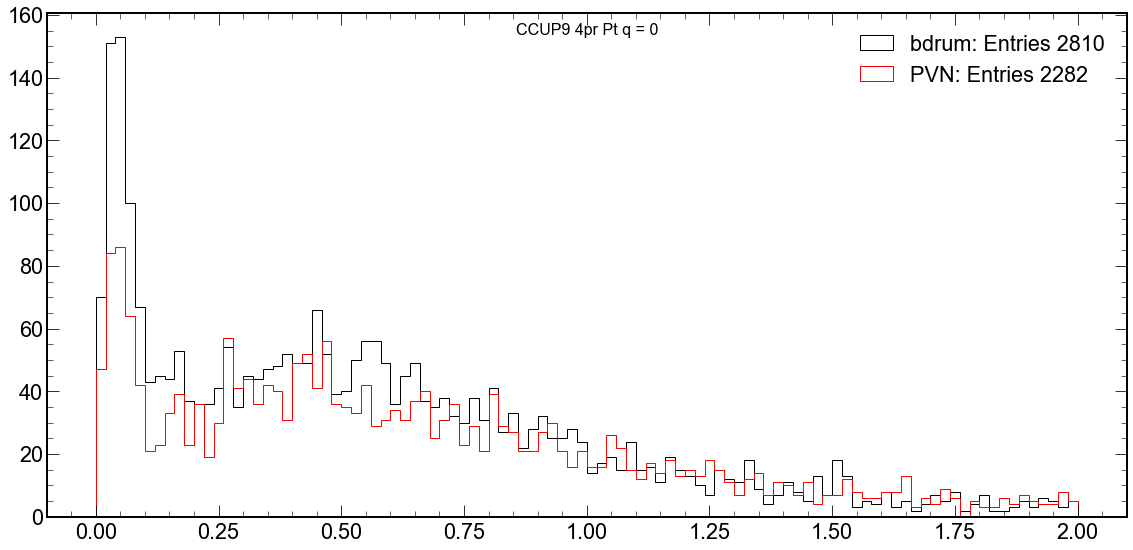

In [36]:
select = ((data['T_HasPointOnITSLayer0']) + (data['T_HasPointOnITSLayer1'])) * data['T_ITSRefit'] * data['T_TPCRefit'] * (data['T_TPCNCls'] > 50)  * (np.abs(data['T_NumberOfSigmaTPCPion']) < 3) #* ((np.abs(data['T_Dca1']) < 3)) # + (np.abs(data['T_Dca1']) < 3))
# get only events with 4 tracks
GoodEvents = np.argwhere(select.sum()==4)
# get events that have total zero charge from 4 tracks 
GoodEvents = GoodEvents[np.argwhere(data['T_Q'][GoodEvents.flatten()].sum()==0).flatten()].flatten()
GoodEvents = GoodEvents[np.argwhere(data['IsCUP9'][GoodEvents.flatten()]==True).flatten()].flatten()

pxg = data['T_Px'][GoodEvents][select[GoodEvents]]
pyg = data['T_Py'][GoodEvents][select[GoodEvents]]
pzg = data['T_Pz'][GoodEvents][select[GoodEvents]]

pt = np.sqrt(pxg.sum()**2  + pyg.sum()**2)
counts, bins = np.histogram(pt,bins=100, range=(0,2))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('CCUP9 4pr Pt q = 0', fontsize=16)
plt.style.use(hep.style.ROOT)
ax.hist(pt, bins=bins, histtype='step', color='black', label=f'bdrum: Entries {np.sum(counts)}')
countspvn, binspvn = np.histogram(pvnPt.flatten(),bins=100, range=(0,2))
ax.hist(pvnPt.flatten(), bins=binspvn, histtype='step', color='red', label=f'PVN: Entries {np.sum(countspvn)}')
ax.legend()
print (counts.sum())

# 51 fitted events without limitations on tracks 

array([0.5346191 , 0.05166583, 2.0135286 , ..., 0.54392743, 0.6127223 ,
       0.14050014], dtype=float32)

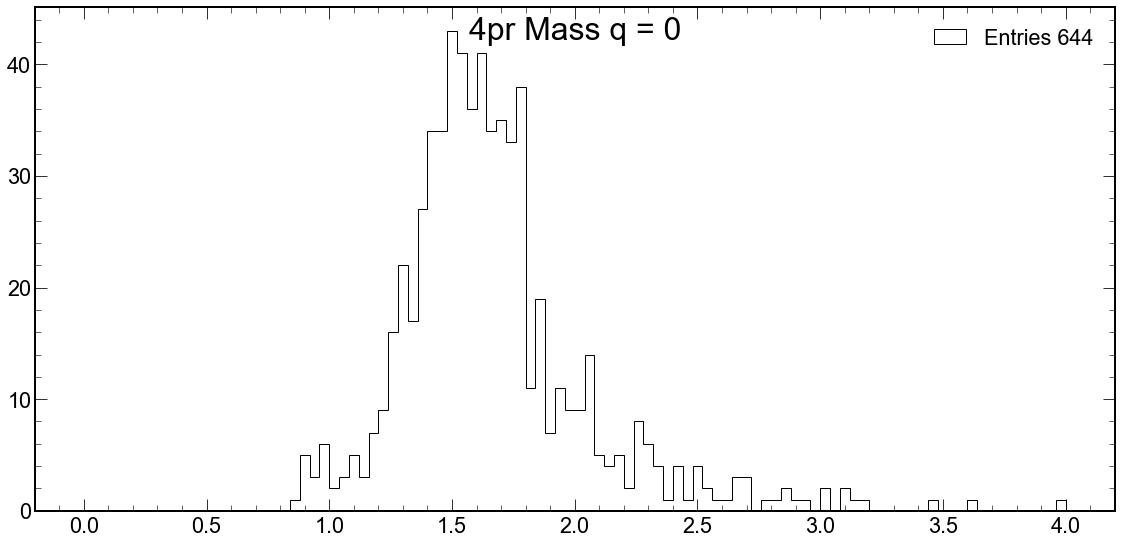

In [7]:
massPion = np.full(pxg.shape[0], 0.140)

# float esum = sqrt( (trk[0]->Px())*trk[0]->Px() + (trk[0]->Py())*trk[0]->Py() +(trk[0]->Pz())*trk[0]->Pz() + partmass*partmass);
# esum = esum + sqrt( (trk[1]->Px())*trk[1]->Px() + (trk[1]->Py())*trk[1]->Py() +(trk[1]->Pz())*trk[1]->Pz() + partmass*partmass);
# float amass = sqrt( esum*esum - pxsum*pxsum - pysum*pysum - pzsum*pzsum );

Energy0 = np.sqrt(massPion**2 + pxg[:,0]**2 + pyg[:,0]**2 + pzg[:,0]**2)
Energy1 = np.sqrt(massPion**2 + pxg[:,1]**2 + pyg[:,1]**2 + pzg[:,1]**2)
Energy2 = np.sqrt(massPion**2 + pxg[:,2]**2 + pyg[:,2]**2 + pzg[:,2]**2)
Energy3 = np.sqrt(massPion**2 + pxg[:,3]**2 + pyg[:,3]**2 + pzg[:,3]**2)

Energy = Energy0 + Energy1 + Energy2 + Energy3

Mass = np.sqrt(Energy**2 - pxg.sum()**2 - pyg.sum()**2 - pzg.sum()**2)[(pt<0.15)]
counts, bins = np.histogram(Mass,bins=100, range=(0,4))
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr Mass q = 0', fontsize=32)
plt.style.use(hep.style.ROOT)
ax.hist(Mass, bins=bins, color='black', histtype='step', label=f'Entries {np.sum(counts)}')
ax.legend()


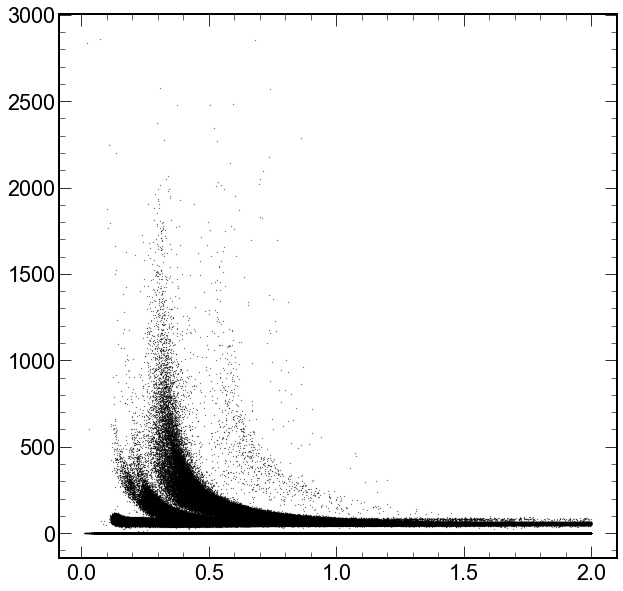

In [8]:
from scipy.stats import gaussian_kde

pt = np.sqrt(data['T_Px']**2 + data['T_Py']**2)#[(np.abs(data['T_NumberOfSigmaTPCPion']) < 3)]
dedx = data['TPCsignal'][(pt<2)].flatten()#[(np.abs(data['T_NumberOfSigmaTPCPion']) < 3)]
pt = pt[pt<2].flatten()
# z = gaussian_kde(pt)(dedx)

plt.style.use(hep.style.ROOT)
plt.scatter(pt.flatten(), dedx.flatten(),s=0.05, color='black')

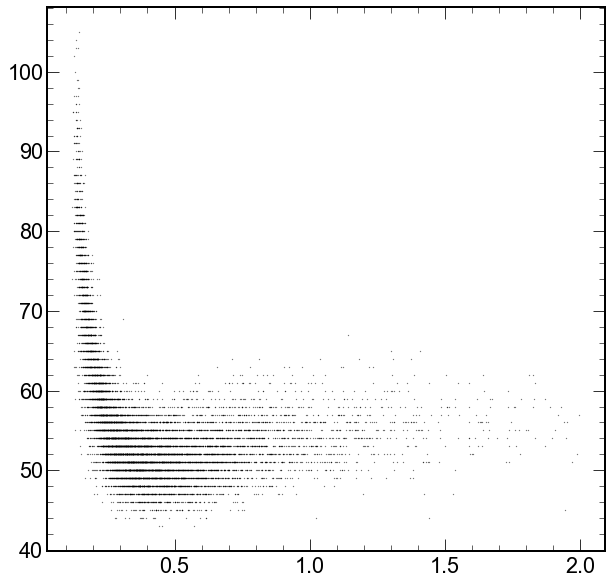

In [13]:
from scipy.stats import gaussian_kde

pxg = data['T_Px'][GoodEvents][select[GoodEvents]]
pyg = data['T_Py'][GoodEvents][select[GoodEvents]]
ptTracks = np.sqrt(pxg**2  + pyg**2).flatten()
dedx = data['TPCsignal'][GoodEvents][select[GoodEvents]].flatten()[ptTracks<2]
ptTracks = ptTracks[ptTracks<2]
# z = gaussian_kde(pt)(dedx)
plt.style.use(hep.style.ROOT)
plt.scatter(ptTracks.flatten(), dedx.flatten(),s=0.05, color = 'black')

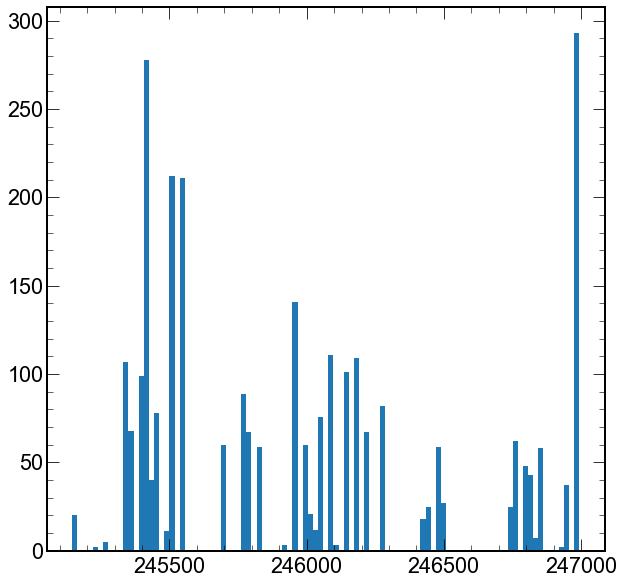

In [17]:
runs = data['RunNum'][GoodEvents]
counts = plt.hist(runs,bins=len(np.unique(runs)))


In [18]:
bins = []
counts = []

for run in np.unique(runs):
    bins.append(run)
    counts.append((data['RunNum'][GoodEvents] == run).sum())
    print(run, (data['RunNum'][GoodEvents] == run).sum())


245145 9
245146 9
245151 1
245152 1
245232 2
245259 5
245345 40
245346 5
245347 25
245349 37
245353 68
245396 34
245397 37
245401 28
245407 107
245409 73
245410 28
245411 70
245441 40
245446 9
245450 10
245453 59
245496 11
245501 41
245504 32
245505 12
245507 127
245540 18
245542 33
245543 65
245544 3
245545 4
245554 88
245692 35
245702 6
245705 19
245775 89
245793 67
245829 20
245831 34
245833 5
245923 3
245949 16
245952 71
245954 54
246001 49
246003 11
246012 21
246037 12
246042 22
246048 8
246049 45
246052 1
246087 106
246089 5
246115 3
246151 21
246152 7
246153 73
246178 3
246180 27
246181 28
246182 47
246185 4
246222 47
246225 20
246272 50
246275 14
246276 18
246431 18
246434 25
246488 59
246493 15
246495 12
246750 12
246751 13
246757 2
246758 13
246759 1
246760 28
246763 11
246765 5
246766 2
246805 14
246807 34
246809 43
246844 7
246845 20
246846 13
246847 16
246851 9
246928 2
246945 27
246948 10
246982 7
246984 59
246989 129
246991 27
246994 71


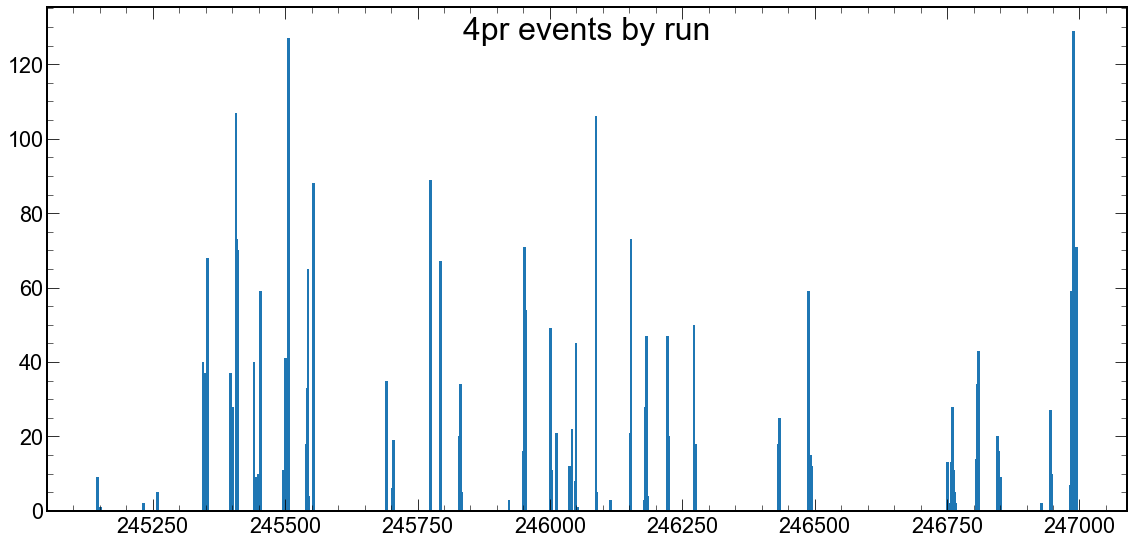

In [27]:
plt.style. use(hep.style.ROOT)
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
fig.suptitle('4pr events by run', fontsize=32)
ax.bar(bins,counts,width=5 )
# ax.set_xticks(bins)
# ax.set_xticklabels(bins,rotation=90, rotation_mode="anchor", ha="right")
plt.show()


In [200]:
plt.style.reload_library

<function matplotlib.style.core.reload_library()>